<a href="https://colab.research.google.com/github/ShivakumarRavi/Lending_club_case_study/blob/main/lending_club_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Case Study**
### **Introduction:**
The Lending Club Loan Approval Analysis case study involves the examination of a dataset named "loan.csv" to determine whether a particular person's loan application should be approved or denied. Lending Club is a peer-to-peer lending platform that connects borrowers with investors. The goal of this analysis is to perform an Exploratory Data Analysis (EDA) to gain insights into the dataset.

### **Dataset Overview:**
The dataset "loan.csv" contains a comprehensive set of information about past loan applicants, including various attributes such as credit scores, employment details, loan amounts, interest rates, loan status, and more. Each row in the dataset represents a unique loan application.

**Key Objectives:**

1.   **Data Preprocessing:** Cleanse and prepare the dataset by handling missing values, outliers, and data formatting issues.
2.   **Exploratory Data Analysis (EDA):** Perform an in-depth analysis of the dataset to understand the patterns, relationships, and trends within the data.
3.   **Data Visualization:** Create visualizations such as histograms, scatter plots, and correlation matrices to visualize the data and gain insights.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/Lending Club Case Study/loan.csv")
print("Data Shape: {}".format(data.shape))
print("Data Size:".format(data.size))
print("INFO: ")
print(data.info())

Data Shape: (39717, 111)
Data Size:
INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Print first 5 rows of the dataset to see the overview of the data

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


From the above block, we understood from the data set, we have 111 features and 39717 data about past loan applications.


1.   As a first step, Check how many columns are having null values and it's values.



In [ ]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There is much intresting fact about from this dataset is, we have more feature columns having NA values and those values doesn't help for our analysis. So, dropping column having only NA.

In [ ]:
data.dropna(axis=1, how='all', inplace=True)

Now, Lets drop the rows having only null or na values

In [ ]:
data.dropna(axis=0, how='all', inplace=True)

Let's check the dataset shape now.

In [ ]:
data.shape

(39717, 57)

After dropping few column, from the dataset we identify that, few columns having only single values accross the data's. those columns are also doesn't help for the analysis. So, dropping those columns.

In [ ]:
data.loc[:, data.nunique() == 1]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


In [ ]:
data.drop(data.loc[:, data.nunique() == 1], axis=1, inplace=True)

Let's check any of the feature having more than 50% of the null values, if any drop those columns.

In [ ]:
data.loc[data.isnull().sum(axis=1) > (data.shape[1]/2),:].shape

(0, 48)

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

From the filtered data, found few columns are ir-revelent to analysis. so we can drop the column to avoid confusion
And also, few columns are related the post approval loan related variables, these post approval variables are doesn't help for finding the "defaulters", so removing those too.

In [ ]:
data.drop(["id", "member_id", "funded_amnt", "emp_title", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "out_prncp", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', "collection_recovery_fee", 'last_pymnt_d', 'last_pymnt_amnt','next_pymnt_d', "last_credit_pull_d"], inplace=True, axis="columns")

In [ ]:
data.shape

(39717, 23)

In [ ]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,other,OR,17.94,Jan-96,0,15,0,53.90%,38,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

Lets identify the percentage of null values in the rest of the columns

In [ ]:
na_column_list = data.columns[data.isna().any()].tolist()
data[na_column_list].isna().sum()/data[na_column_list].count() * 100

emp_length              2.781947
revol_util              0.126049
pub_rec_bankruptcies    1.786263
dtype: float64

We observed that, percentage of null values are not much more in the above 3 columns. So, we can either drop or replace with mean/median/mode values accordingly.

In [ ]:
data.drop(index=data[data['revol_util'].isna()].index, inplace=True)

In [ ]:
data['pub_rec_bankruptcies'].fillna(value=data['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [ ]:
data["emp_length"].fillna(value=data['emp_length'].mode()[0], inplace=True)

In [ ]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

We observed from the data, emp_length doesn't have proper integer values, so lets remake the column with int values instead of string. it's help for much easy analysis.

In [ ]:
data['emp_length'] = data['emp_length'].apply(lambda x: 10 if "+" in x else 0 if "<" in x else str(x).split("year")[0].strip())

In [ ]:
data["term"] = data["term"].apply(lambda x: str(x).split("months")[0].strip())

In [ ]:
data["int_rate"] = data["int_rate"].apply(lambda x: str(x).split("%")[0].strip())

In [ ]:
data['revol_util'] = data['revol_util'].apply(lambda x: str(x).split("%")[0].strip())

Now, lets change the data types.

In [ ]:
data["term"] = data["term"].astype(dtype="int")
data["int_rate"] = data["int_rate"].astype(dtype="float")
data["emp_length"] = data['emp_length'].astype(dtype="int")
data["revol_util"] = data["revol_util"].astype(dtype="float")

In [ ]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
data['home_ownership'].replace(to_replace = 'NONE',value='OTHER', inplace=True)

In [ ]:
data.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,11227.664053,10405.885280,42.424282,12.016587,324.770793,5.111629,6.899952e+04,13.318704,0.869211,9.300250,0.055084,48.832152,22.103411,0.042529
std,7456.610740,7128.338379,10.626110,3.723856,208.882852,3.607591,6.378947e+04,6.676975,1.070422,4.398866,0.237247,28.332634,11.398386,0.202668
min,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5000.000000,36.000000,9.250000,167.080000,2.000000,4.051632e+04,8.180000,0.000000,6.000000,0.000000,25.400000,14.000000,0.000000
50%,10000.000000,8975.000000,36.000000,11.830000,280.610000,5.000000,5.900000e+04,13.410000,1.000000,9.000000,0.000000,49.300000,20.000000,0.000000
75%,15000.000000,14400.000000,60.000000,14.540000,430.780000,10.000000,8.240000e+04,18.600000,1.000000,12.000000,0.000000,72.400000,29.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000


Now, Time for Outlier analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x7df8e4020970>,
 'caps': [<matplotlib.lines.Line2D at 0x7df8e40237f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df8e4218ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df8e4022230>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df8e4022e60>],
 'means': []}

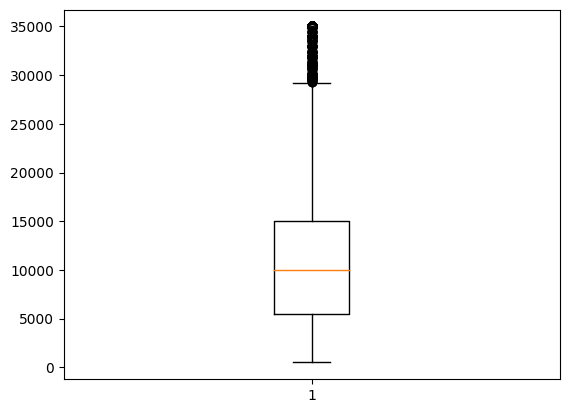

In [ ]:
plt.boxplot(x=[data['loan_amnt']])

Here we have a clean notation of outlier in the loan amount feature. Lets clear the outlier values.

In [ ]:
data['loan_amnt'].describe(percentiles=[0.1, 0.5, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

count    39667.000000
mean     11227.664053
std       7456.610740
min        500.000000
10%       3200.000000
50%      10000.000000
80%      16750.000000
90%      22000.000000
95%      25000.000000
96%      25500.000000
97%      30000.000000
98%      31500.000000
99%      35000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
data = data[data['loan_amnt'] < data['loan_amnt'].quantile(q=0.96)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7df8e2855630>,
 'caps': [<matplotlib.lines.Line2D at 0x7df8e2855b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df8e41c8340>],
 'medians': [<matplotlib.lines.Line2D at 0x7df8e28560b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df8e2856350>],
 'means': []}

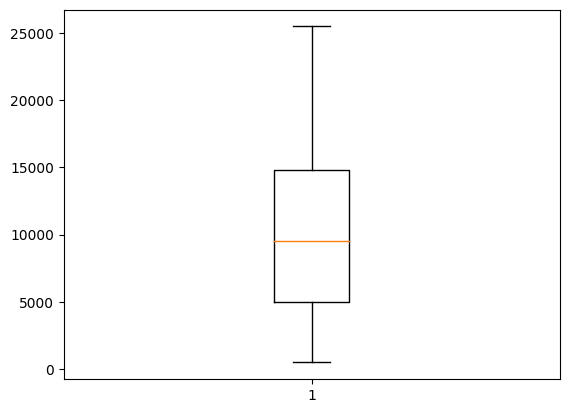

In [ ]:
plt.boxplot(x=[data['loan_amnt']])

Now, let repeat the same analysis for few other features to detect the outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x7df8e27c8460>,
 'caps': [<matplotlib.lines.Line2D at 0x7df8e27c89a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df8e27c81c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df8e27c8ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df8e27c9180>],
 'means': []}

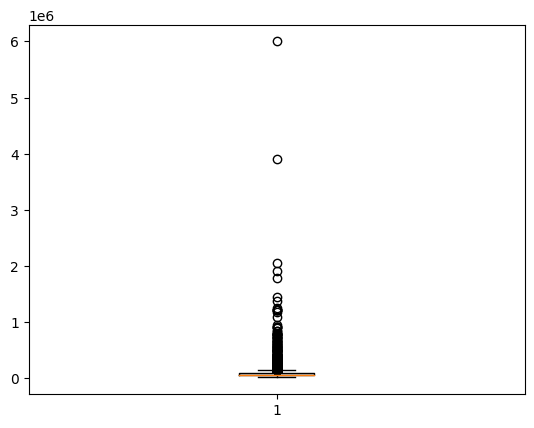

In [ ]:
plt.boxplot(data['annual_inc'])

In [ ]:
data['annual_inc'].quantile([0.1, 0.5, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

0.10      30000.0
0.50      57000.0
0.80      87950.0
0.90     110000.0
0.95     135090.0
0.96     145000.0
0.97     157500.0
0.98     180000.0
0.99     215000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [ ]:
data = data[data['annual_inc'] < data['annual_inc'].quantile(q=0.90)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7df8e2dbbeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7df8e252c430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df8e2dbbc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7df8e252c970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df8e252cc10>],
 'means': []}

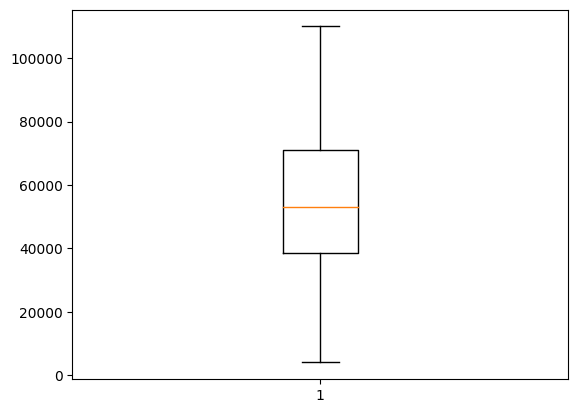

In [ ]:
plt.boxplot(data['annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7df8e257a8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7df8e257ae00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df8e257a620>],
 'medians': [<matplotlib.lines.Line2D at 0x7df8e257b340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df8e257b5e0>],
 'means': []}

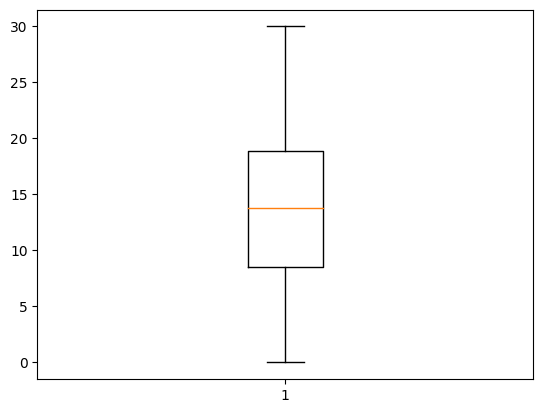

In [ ]:
plt.boxplot(data['dti'])

In [ ]:
data[['pub_rec', 'total_acc']].corr()

,pub_rec,total_acc
pub_rec,1.000000,-0.010271
total_acc,-0.010271,1.000000


In [ ]:
data[['open_acc', 'total_acc']].corr()

,open_acc,total_acc
open_acc,1.000000,0.681362
total_acc,0.681362,1.000000


In [ ]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

The records having having the status as 'Current' are represent loan is in progress. Since those are already approved and those data's doesn't help for future prediction, so let's remove those records.

In [ ]:
data = data[data['loan_status'] != 'Current']

Now, we are ready to get more insight into the data via some visualization. by this way, we can predict "defaulters" in quick way.

First, see the distribution accross catagorical data

<Axes: xlabel='loan_status', ylabel='count'>

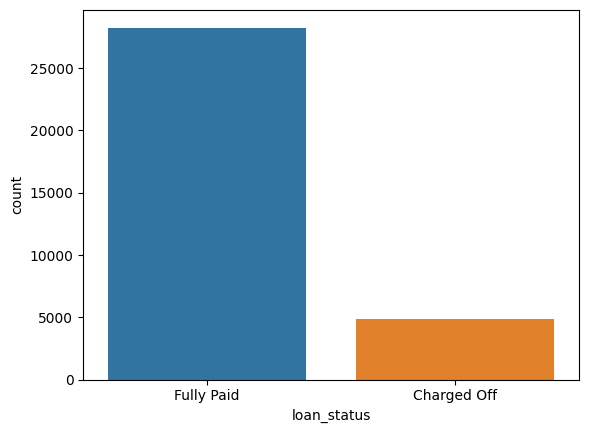

In [ ]:
sns.countplot(data=data, x="loan_status")

From the above visualization, most of the borrowers from this finance company are paid their amount back, but few of them are marked as "Charged Off"

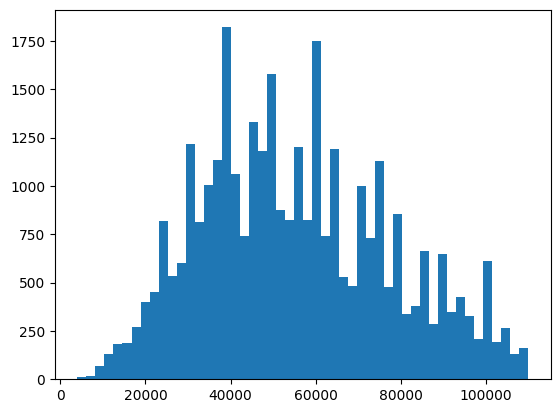

In [ ]:
plt.hist(data['annual_inc'], bins=50)
plt.show()

<Axes: xlabel='grade', ylabel='count'>

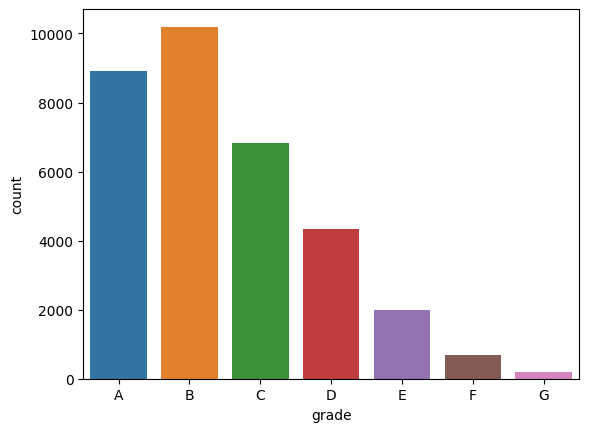

In [ ]:
sns.countplot(data=data, x="grade", order=sorted(data['grade'].unique()))

<Axes: xlabel='grade', ylabel='count'>

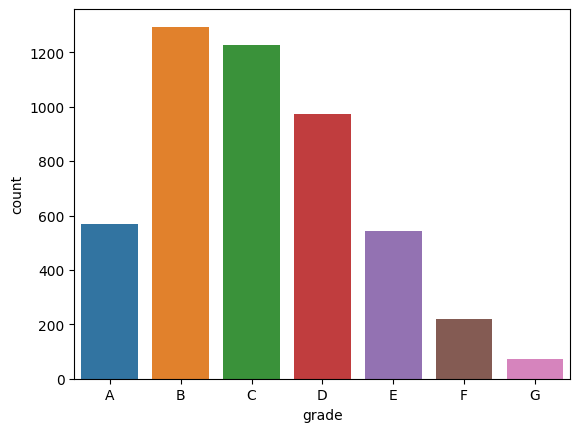

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x="grade", order=sorted(data['grade'].unique()))

<Axes: xlabel='sub_grade', ylabel='count'>

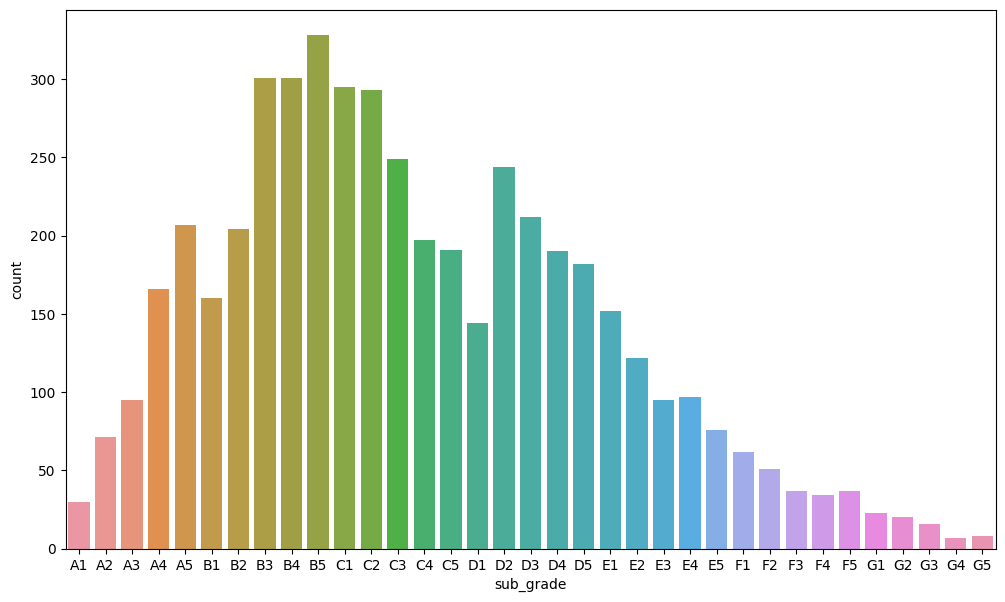

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='sub_grade', order = sorted(data['sub_grade'].unique()))

From the above observation, people who belongs to the group "B, C, D" are mostly comes under "defaulters"

<Axes: xlabel='home_ownership', ylabel='count'>

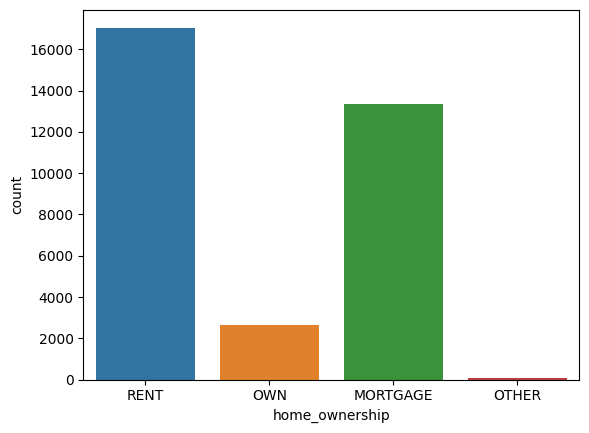

In [ ]:
sns.countplot(data=data, x='home_ownership')

<Axes: xlabel='home_ownership', ylabel='count'>

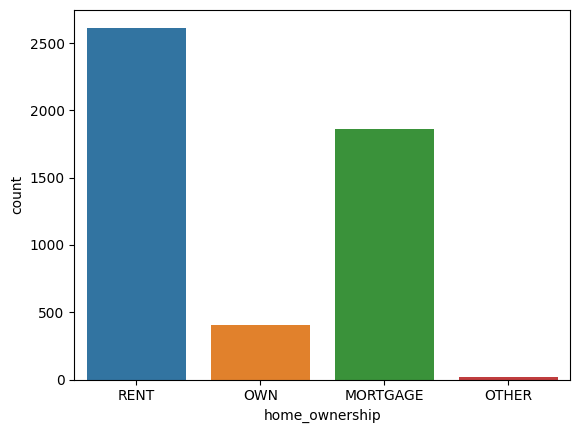

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='home_ownership')

From the above observation, we can say that, people who has RENT and MORTGAGE home are falls under "defaulters".

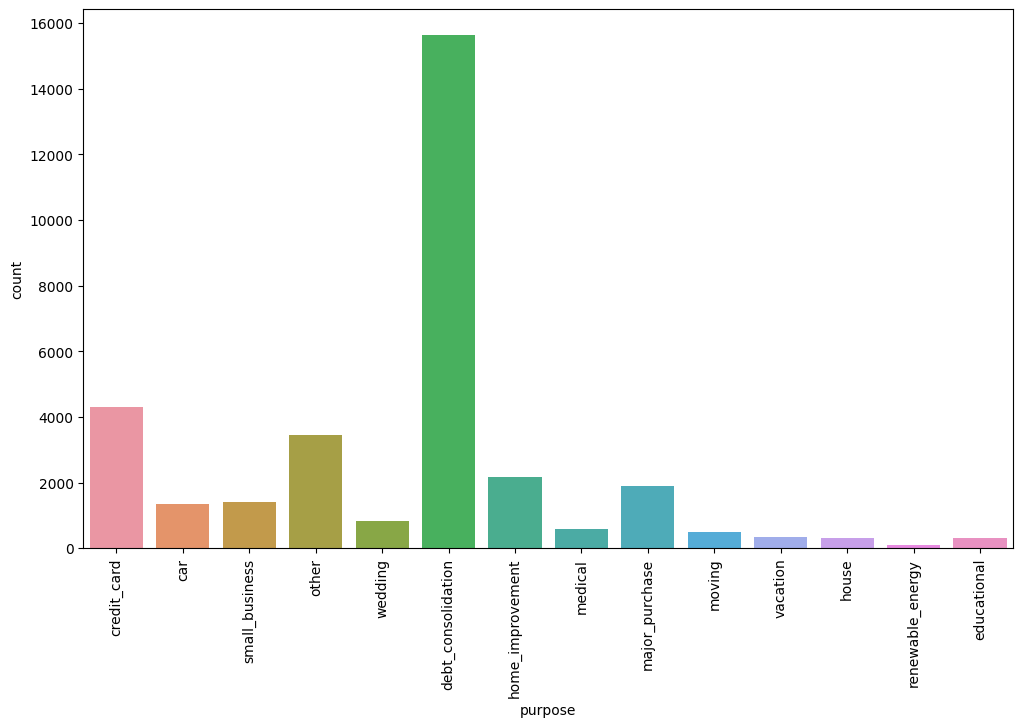

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='purpose')
plt.xticks(rotation=90)
plt.show()

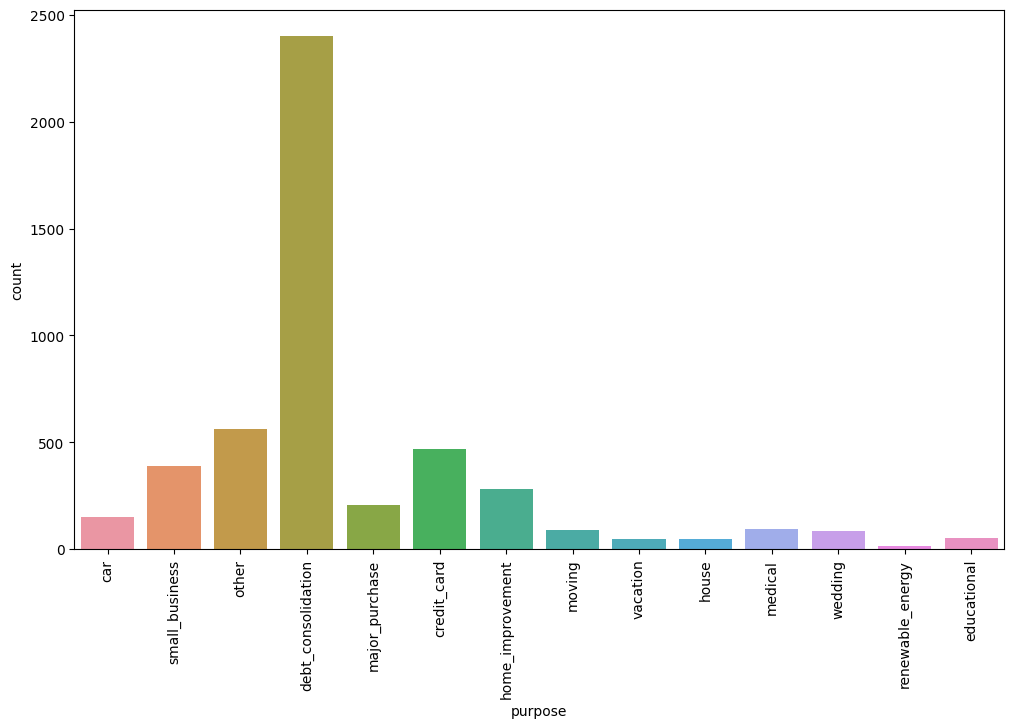

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='purpose')
plt.xticks(rotation=90)
plt.show()

From above observation, poeple who taken the loan for the purpose of debt_consolidation are mostly not repaying the amount.

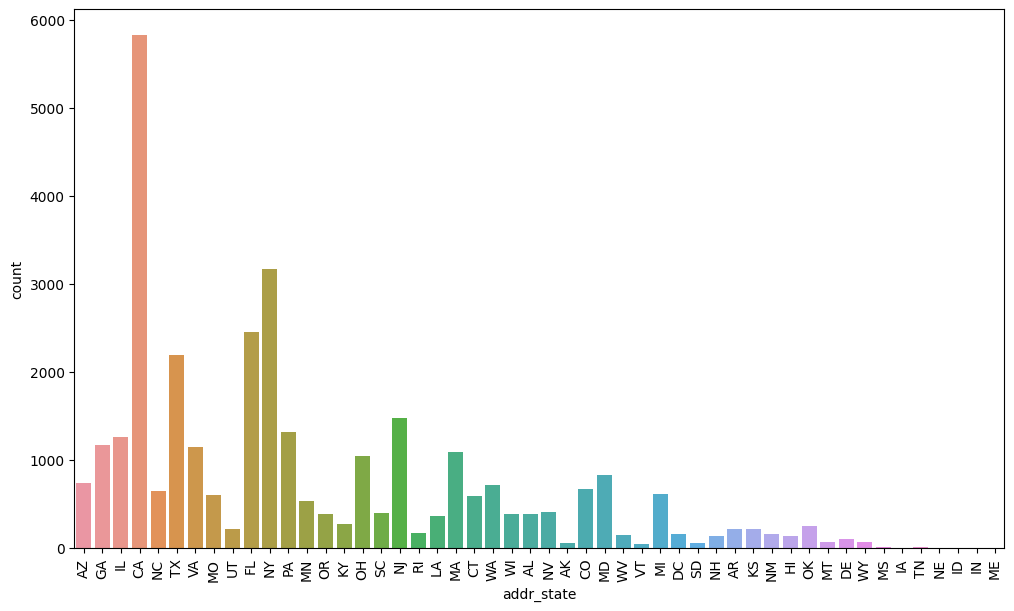

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='addr_state')
plt.xticks(rotation=90)
plt.show()

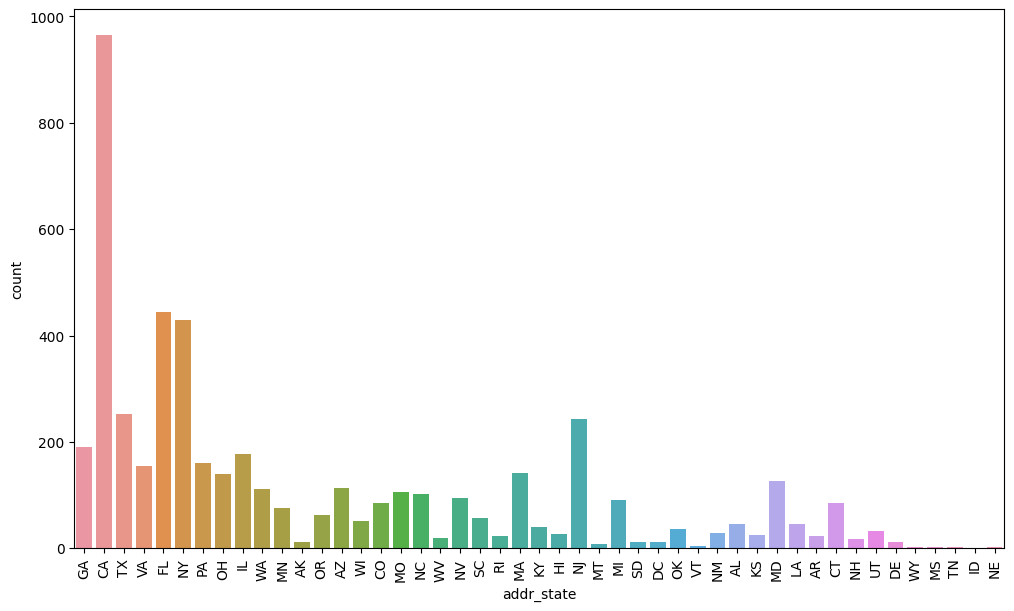

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='addr_state')
plt.xticks(rotation=90)
plt.show()

From the above visualization, we can say that, people who took loan from the state "CA" not mostly not repaying the amount back.

<Axes: xlabel='verification_status', ylabel='count'>

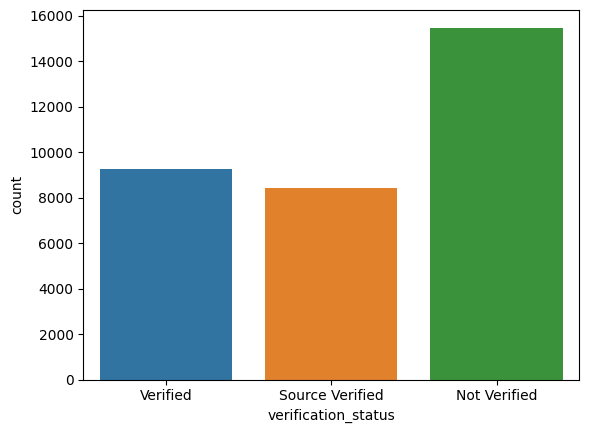

In [ ]:
sns.countplot(data=data, x='verification_status')

<Axes: xlabel='verification_status', ylabel='count'>

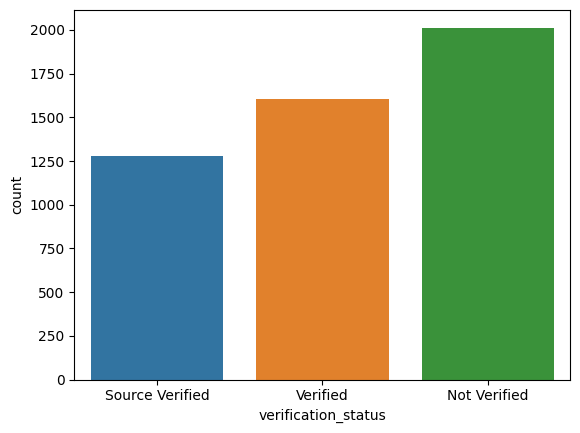

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='verification_status')

In [ ]:
data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [ ]:
data['issue_year'] = data['issue_d'].apply(lambda x: str(x).split("-")[1])

In [ ]:
data['issue_month'] = data['issue_d'].apply(lambda x: str(x).split("-")[0])

<Axes: xlabel='issue_year', ylabel='count'>

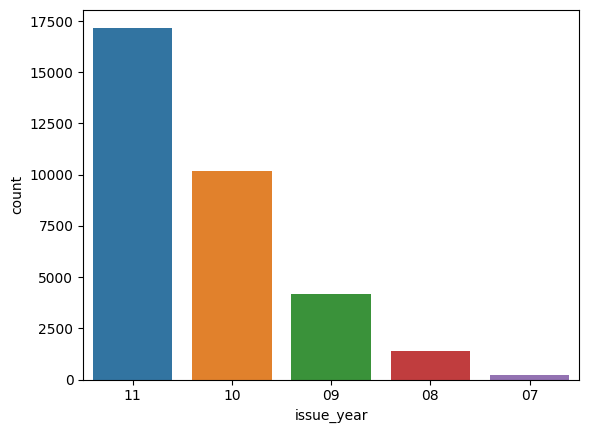

In [ ]:
sns.countplot(data=data, x='issue_year')

<Axes: xlabel='issue_month', ylabel='count'>

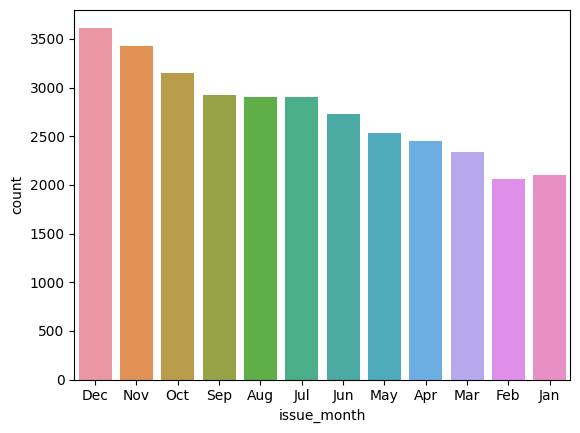

In [ ]:
sns.countplot(data=data, x='issue_month')

it's clearly visible, most of the loans are approved during Dec 2011.

<Axes: xlabel='issue_month', ylabel='count'>

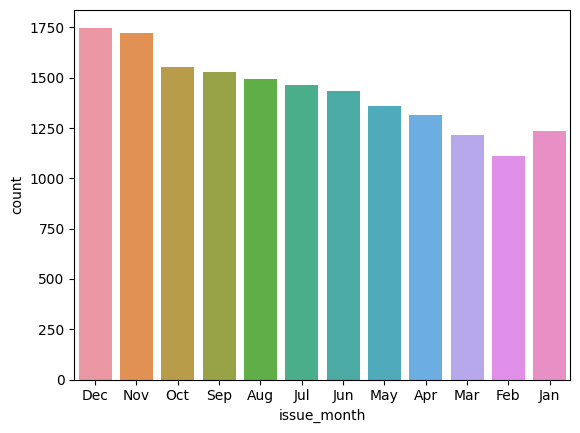

In [ ]:
sns.countplot(data=data[data.issue_year == '11'], x='issue_month')

<Axes: xlabel='issue_month', ylabel='count'>

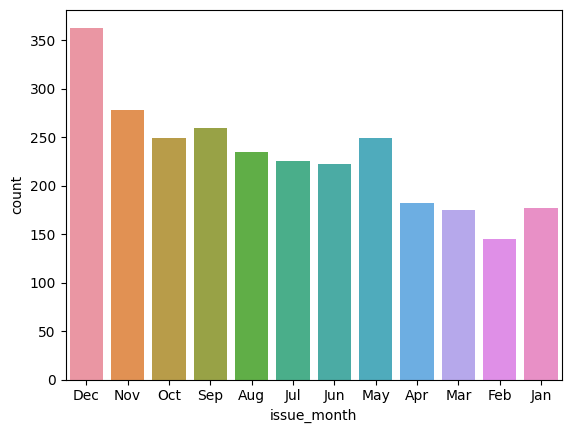

In [ ]:
sns.countplot(data=data[(data.issue_year == '11') & (data.loan_status == 'Charged Off')], x='issue_month')

it's clear that, most of the loan are issues at the month of Nov and Dec and people who brought the loan amount at the time of December, who not repay the amount

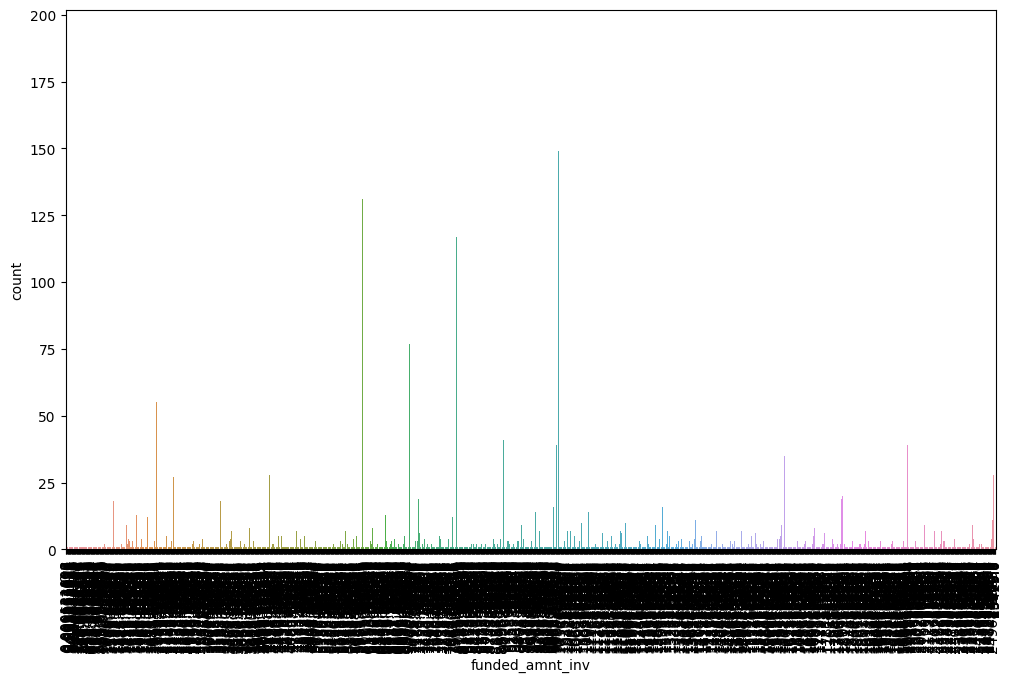

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='funded_amnt_inv')
plt.xticks(rotation=90)
plt.show()

The data is not clear in this graph, since we have more data in it, so let's group the values into bins

In [ ]:
data['funded_amnt_inv_group'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

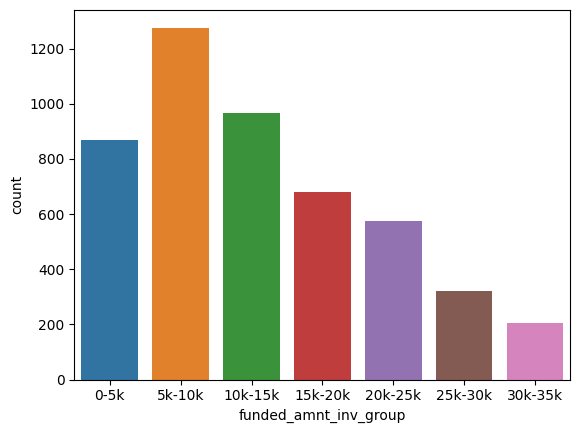

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='funded_amnt_inv_group')

Now, it's much clear, who brought the loan between 5k-10k are not repaying the amount.

In [ ]:
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='dti_groups', ylabel='count'>

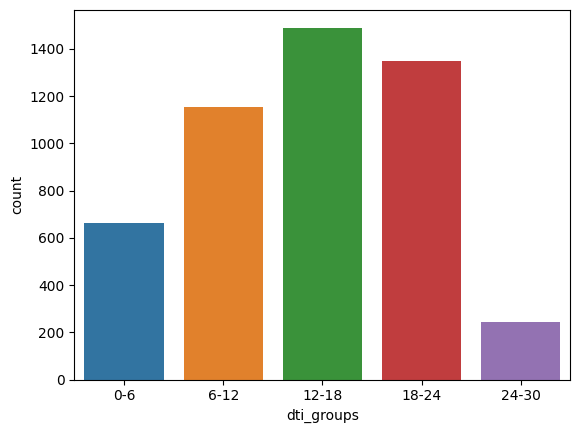

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='dti_groups')

people who having the dti 12-18 range in their credit file are mostly falls under "defaulters".

In [ ]:
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

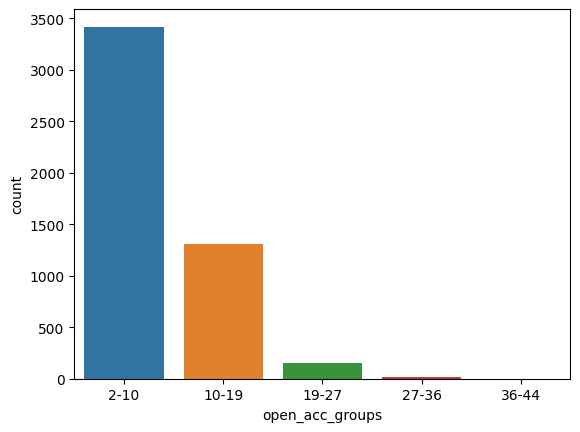

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='open_acc_groups')

From the above visualization, we can say that, people who have between 2-10 open credit lines in the borrower's credit file are mostly not repaying the amount.

In [ ]:
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<Axes: xlabel='loan_amnt', ylabel='annual_inc_groups'>

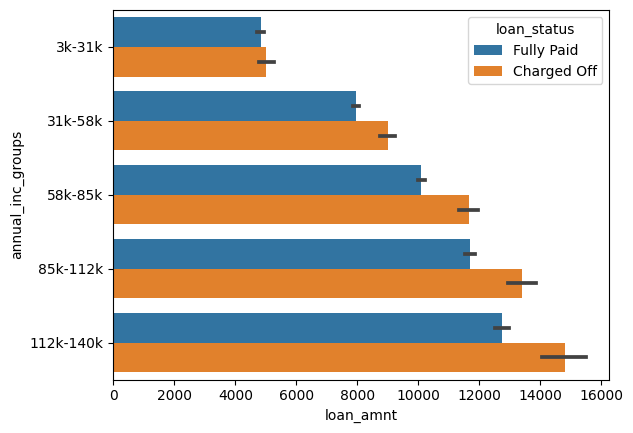

In [ ]:
sns.barplot(data=data, x='loan_amnt', y='annual_inc_groups', hue='loan_status')

From the above visualization, we observe that, across from all annual income group more poeple are defaulters.

<Axes: xlabel='int_rate', ylabel='funded_amnt_inv_group'>

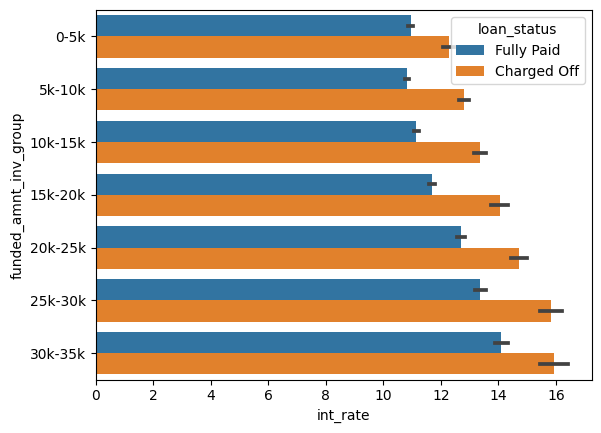

In [ ]:
sns.barplot(data=data, x='int_rate', y='funded_amnt_inv_group', hue='loan_status')

From the above visualization, we observe that, across from all loan group more poeple are defaulters.

<Axes: xlabel='home_ownership', ylabel='annual_inc'>

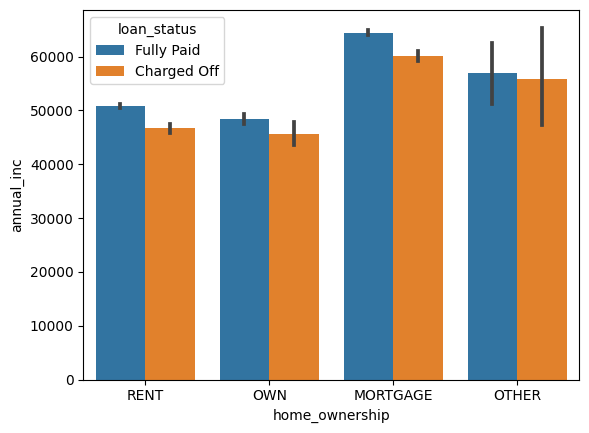

In [ ]:
sns.barplot(data=data, x='home_ownership', y='annual_inc', hue='loan_status')

From the above visualization, we observe that, people who lives any type of house are mostly paying their amount back, but who lives in MORTGAGE are taking most of the loan and similarly not paying back also.

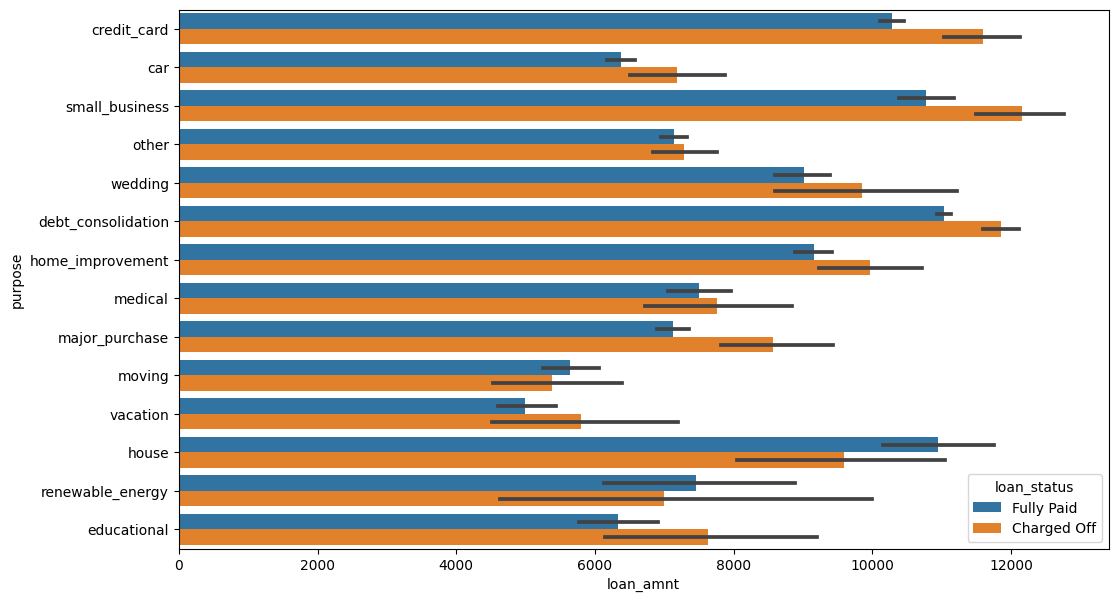

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='loan_amnt', y='purpose', hue='loan_status')
plt.show()

Here we have a intresting fact, people who brought the loan for the purpose of either house, renewable_energy are mostly paid their amount to the finance. and other are likely not paying back the amount.

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

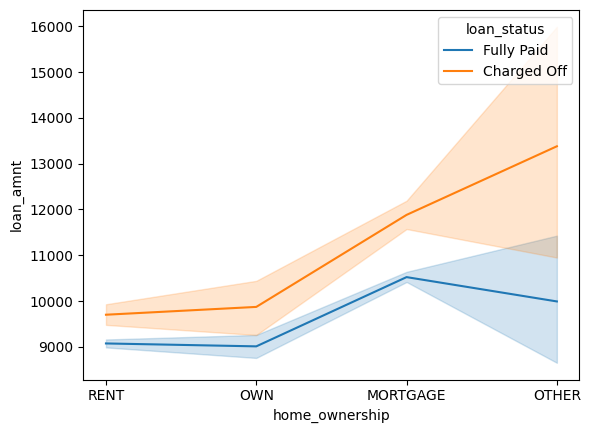

In [ ]:
sns.lineplot(data=data, x='home_ownership', y='loan_amnt', hue='loan_status')

From this point of view, we can see that MORTGAGE and OTHER people are taking more loan amount and not paying back also.

<Axes: xlabel='issue_month', ylabel='loan_amnt'>

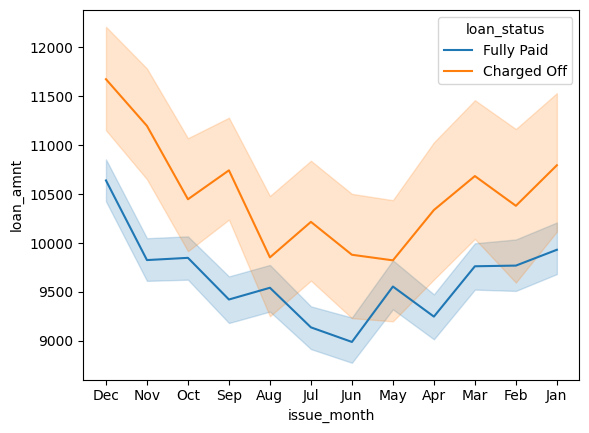

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='issue_month', hue ='loan_status')

From this, people who taken the loan of end of the year are mostly not repaying the amount.

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

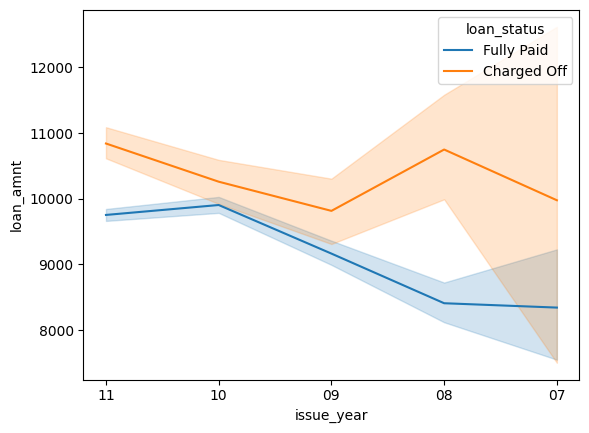

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='issue_year', hue ='loan_status')

There is huge gap betwween the people who paid the amount and not pay the amount during the year 2007, 2008

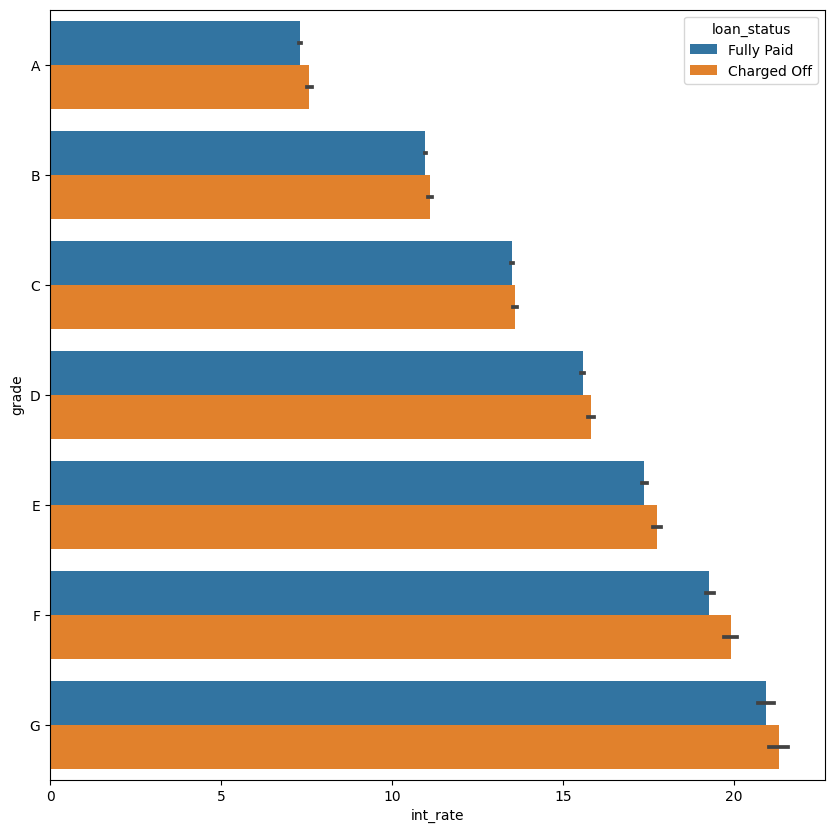

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate', y='grade', hue ='loan_status', order=sorted(data['grade'].unique()))
plt.show()

When the grade is F or G then we are getting the more defaulters.

<Axes: xlabel='dti_groups', ylabel='emp_length'>

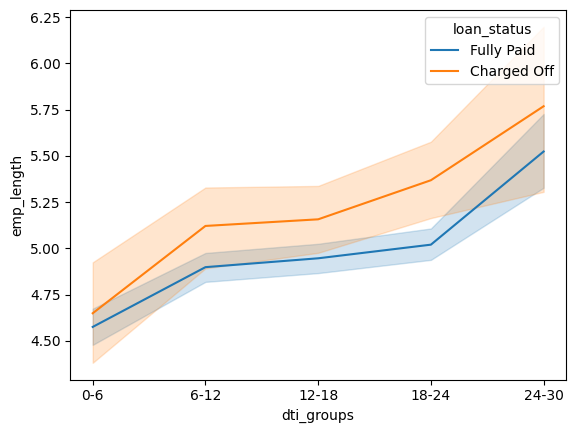

In [ ]:
sns.lineplot(data =data,y='emp_length', x='dti_groups', hue ='loan_status')

<Axes: xlabel='dti_groups', ylabel='loan_amnt'>

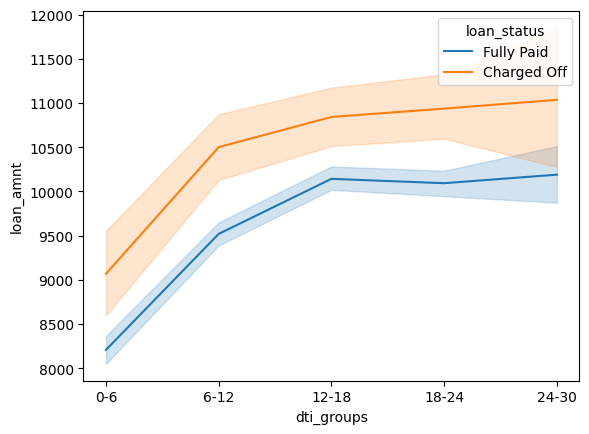

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='dti_groups', hue ='loan_status')

Here we have the clear visibility that, people who have more dti value in their credit file are mostly falls under defaulters.

**Observation Result**

Here we the final result message from our exploratory data analysis (EDA) process conducted on the "loan.csv" dataset. The objective of this analysis was to gain insights into the dataset, particularly identifying individuals who may fall into the "defaulter" category. These findings are crucial for decision-making in the context of loan approval, as it helps assess the risk associated with potential borrowers.

**Summary of Visualization and Key Insights:**
1.  **Data Overview:** We began by gaining a comprehensive understanding of the dataset. It contains 39717 records and 111 features, with each row representing a loan applicant.

2.  **Data Quality:** We assessed data quality and found that irrelavent, NA, single value columns and Outliers. These issues were addressed appropriately during data preprocessing.

3.  **Feature Distributions:** We visualized the distributions of key features such as credit score, income, employment history, and debt-to-income ratio. This provided us with a clear view of the dataset's characteristics.

4.  **Defaulters Identification:** We visually represented and identified the peoples who have more chance of getting defaulter.